<h1 align="center"> Analysis of FIFA 19 Complete Dataset and Development of A Model for Player Wages Prediction </h1>
<h3 align="center"> By Prosper Ayawah </h3>

# Introduction: 
The business problem that we want to take on is involved in the professional world of soccer. We want to help professional soccer orgainzations help predict the potential benefits a player will add to their orgainzation. This could help organizations determine how much they want to invest in a player and this could help them in budgeting when it comes to finalizing rosters. All of this data will be able to allow organizations to rank players from most valuable to least valuable.

# High Level Requirements: 
This dataset has a total of 89 columns and 18206 entries. The goal is to take this massive amount of player data and be able to form into graphs, charts, and rankings to display which players are the best to have in your soccer orgainzations.

Some of the questions we have are: 
1. Does age have any affect on their ranking?
2. Does their wage correlate with their ranking? 
3. What positions are the highest paid? 
4. What does a soccer organizations need to focus on in order to improve their team? 
5. Does their position affect their wage? 
6. Do the highest paid players have the best potential overall?

Ultimately, we want to develop a predictive model for predicting the wages of soccer players

# Data Source:
- Kaggle - FIFA dataset

- 18206 Observations

- 89 Columns 

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import locale
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Load and explore data

In [2]:
#importing dataset - makes sure to download it into the same folder as all your other python stuff
#The dataset is huge - give it some time to run. We can work on cutting it down later.
dat = pd.read_csv('data.csv', index_col=0)
#dat.info()

In [3]:
# the number of observastions, meets the requirement
len(dat)

18207

In [4]:
#The number of columns, meets the requirement 
len(dat.columns)

88

In [5]:
#A quick look at the data. We won't care about some of the columns - Like pictures and stuff like that
dat.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
#number of unique clubs
len(dat['Club'].unique())

652

In [7]:
#Age range
datAge = dat [['Age']]
for col in datAge.columns:
    print(col + ' is in the range [',
          min(datAge[col]),
          ',',
          max(datAge[col]),
          ']')

Age is in the range [ 16 , 45 ]


In [8]:
#Wage range
#we will need to clean up the 'K, once we learn how to'
datWage = dat [['Wage']]
for col in datWage.columns:
    print(col + ' is in the range [',
          min(datWage[col]),
          ',',
          max(datWage[col]),
          ']')

Wage is in the range [ € 0 , €9K ]


In [9]:
#Number of unique nationalities 
len(dat['Nationality'].unique())

164

## 2. Data Manupulation
### 2.1 Drop all the columns that are irrelevant to the study

Here, we are dropping all of the columns that we believe will not make a difference in ranking the players. This is intended to bring in more accurate results and generate solutions that will be more meaningful. 

In [10]:
dat = dat.drop(['ID','Photo','Flag','Club Logo','Real Face','Body Type',
                'Loaned From','LS','ST','RS',
               'LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',
                'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB',
               'RCB','RB','Special','Jersey Number'], axis = 1)


### 2.2 Change the data type of some variable 
Here, we are manipulating some of the data so we can make it more meaningful.

In [11]:
# Converting the strings in Value to floats
Val = dat['Value'].str.extract("([\d.]+)").astype(float)
pattern = r'M'
c_M = dat['Value'].str.contains(pattern)
for i in range(0,len(dat)):
    if c_M.loc[i] == True:
        Val.loc[i] = Val.loc[i] * 1000000
    else:
        Val.loc[i] = Val.loc[i] * 1000
dat['Value'] = Val

# Converting the strings in Wage to floats
dat['Wage'] = dat['Wage'].str.extract("([\d.]+)").astype(float)*1000

In [12]:
# Converting the strings in Release Clause to floats
Rel = dat['Release Clause'].str.extract("([\d.]+)").astype(float)
pattern = r'M'
c_M = dat['Release Clause'].str.contains(pattern)
for i in range(0,len(dat)):
    if c_M.loc[i] == True:
        Rel.loc[i] = Rel.loc[i] * 1000000
    else:
        Rel.loc[i] = Rel.loc[i] * 1000
dat['Release Clause'] = Rel

In [13]:
# Converting the strings in Weight to floats
dat['Weight'] = dat['Weight'].str.extract("([\d.]+)").astype(float)

In [14]:
# Drop observation where 'Weight', 'Height' and 'Joined' have missing values
dat = dat.dropna(subset=['Weight','Height','Joined'])
# Drop observation where 'Value' is equal to zero
dat = dat[dat.Value != 0]

In [15]:
# Converting the strings in Height to floats
h1 = dat['Height'].str.split('\'')  
hght = []
for h1[i] in h1:
    h2 = format(int(h1[i][0]) + (int(h1[i][1])/12), '.2f')
    hght.append(h2)
dat['Height'] = hght
dat['Height'] = dat['Height'].astype(float)

In [16]:
# Rename columns to include units
dat = dat.rename(columns = {'Value':'Value (€)',
                           'Wage':'Wage (€)',
                           'Release Clause':'Release Clause (€)',
                           'Height':'Height (ft)',
                           'Weight':'Weight (lbs)',
                           'Overall':'Overall Rating'})

In [17]:
dat['Position'] = dat['Position'].astype('category')

### 2.3 Create new columns

In [18]:
# Convert date Joined to datetime
from datetime import datetime
d_t = []
for i in dat['Joined']:
    dt = datetime.strptime(str(i), '%d-%b-%y')
    d_t.append(dt)
dat['Joined'] = d_t

In [19]:
# Extract joining year and subtract it from Contract Valid Until to get Contract Duration
dat['Contract Duration'] = dat['Contract Valid Until'].astype(int) - dat['Joined'].dt.year.astype(int)

In [20]:
# Drop Joined and Contract Valid Until
dat = dat.drop(['Joined','Contract Valid Until'], axis = 1)

In [21]:
# Split the work rate into two columns 
#(attack rate and defence work rate) and drop work rate
WR = dat['Work Rate'].str.split('/', expand = True)
WR.columns = ['Attack Rate', 'Defence Rate']

# Attach WR to dat
dat = pd.concat([dat, WR], axis = 1, sort = False)

# Drop Work Rate
dat = dat.drop(['Work Rate'], axis = 1)

## 3. Summerization and Visualization

Selecting the impactful data and putting it into a dataframe to help rank the players. The variables include:
1. Name
2. Age 
3. Nationality 
4. Overall rating 
5. Potential 
6. Club 
7. Value(€)
8. Wage(€) 
9. Preferred Foot 
10. International Reputation 
11. Weak Foot 
12. Skill Moves 
13. Position 
14. Height(ft)
15. Weight(lbs)
16. Release Clause
17. Contract Duration 
18. Attack Rate 
19. Defence Rate 

We believe these are the variables that are most accurately going to rank the players. These variables put value on the player and can be ranked in comparison to others while also maintaining valuable attributes. Some of the variables are used only to identify the player for example, their name and nationality, but the rest can be used to guide teams to acquire new players.

In [22]:
# Select the impactful variables
dat1 = dat[['Name', 'Age','Nationality', 'Overall Rating', 'Potential', 'Club','Value (€)',
            'Wage (€)','Preferred Foot' ,'International Reputation', 'Weak Foot',
            'Skill Moves', 'Position','Height (ft)','Weight (lbs)','Release Clause (€)',
            'Contract Duration','Attack Rate','Defence Rate']]
dat1.sample(10)

,Name,Age,Nationality,Overall Rating,Potential,Club,Value (€),Wage (€),Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height (ft),Weight (lbs),Release Clause (€),Contract Duration,Attack Rate,Defence Rate
12931,T. Schilk,26,Germany,63,65,Hallescher FC,375000.0,1000.0,Right,1.0,4.0,2.0,RWB,6.17,165.0,572000.0,4,Medium,Medium
773,Bastos,26,Angola,78,79,Lazio,10000000.0,44000.0,Right,2.0,3.0,2.0,CB,5.92,170.0,17800000.0,4,Medium,High
1243,M. Uribe,27,Colombia,76,77,Club América,8500000.0,54000.0,Right,1.0,4.0,3.0,RCM,6.00,157.0,15100000.0,6,High,High
3126,K. Hansen,29,Denmark,73,73,FC Midtjylland,3100000.0,18000.0,Right,1.0,3.0,2.0,RCB,6.00,163.0,4000000.0,7,Medium,Medium
3141,J. Gutiérrez,34,Argentina,73,73,Defensa y Justicia,1900000.0,12000.0,Right,2.0,3.0,3.0,CM,6.00,183.0,2900000.0,4,Medium,High
4944,Rodrigo Pinho,27,Brazil,70,70,Clube Sport Marítimo,1900000.0,7000.0,Left,1.0,2.0,3.0,ST,6.08,174.0,4000000.0,4,Medium,Medium
16536,N. Simon,18,France,57,73,Racing Club de Lens,210000.0,1000.0,Left,1.0,5.0,2.0,CM,5.58,137.0,499000.0,3,High,Medium
14686,Otaño,22,Spain,60,70,CD Tenerife,260000.0,1000.0,Right,1.0,3.0,1.0,GK,6.00,165.0,468000.0,2,Medium,Medium
12687,PC,24,Brazil,63,70,Orlando City SC,425000.0,1000.0,Left,1.0,2.0,2.0,LB,5.67,161.0,723000.0,3,High,Medium
10553,D. Dziwniel,25,Poland,65,68,Zagłębie Lubin,550000.0,2000.0,Left,1.0,2.0,3.0,LB,5.83,159.0,784000.0,3,Medium,Medium


In [23]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Name                      16643 non-null  object  
 1   Age                       16643 non-null  int64   
 2   Nationality               16643 non-null  object  
 3   Overall Rating            16643 non-null  int64   
 4   Potential                 16643 non-null  int64   
 5   Club                      16643 non-null  object  
 6   Value (€)                 16643 non-null  float64 
 7   Wage (€)                  16643 non-null  float64 
 8   Preferred Foot            16643 non-null  object  
 9   International Reputation  16643 non-null  float64 
 10  Weak Foot                 16643 non-null  float64 
 11  Skill Moves               16643 non-null  float64 
 12  Position                  16643 non-null  category
 13  Height (ft)               16643 non-null  floa

### 3.1 Summary

In [24]:
dat1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,16643.0,2.522622e+01,4.716588e+00,16.00,21.00,25.00,29.00,4.500000e+01
Overall Rating,16643.0,6.616277e+01,7.008236e+00,46.00,62.00,66.00,71.00,9.400000e+01
Potential,16643.0,7.114090e+01,6.151409e+00,48.00,67.00,71.00,75.00,9.500000e+01
Value (€),16643.0,2.442667e+06,5.720629e+06,10000.00,300000.00,675000.00,2000000.00,1.185000e+08
Wage (€),16643.0,9.618038e+03,2.226352e+04,1000.00,1000.00,3000.00,8000.00,5.650000e+05
International Reputation,16643.0,1.114823e+00,3.985593e-01,1.00,1.00,1.00,1.00,5.000000e+00
Weak Foot,16643.0,2.942919e+00,6.599325e-01,1.00,3.00,3.00,3.00,5.000000e+00
Skill Moves,16643.0,2.349516e+00,7.558554e-01,1.00,2.00,2.00,3.00,5.000000e+00
Height (ft),16643.0,5.946334e+00,2.204134e-01,5.08,5.75,5.92,6.08,6.750000e+00
Weight (lbs),16643.0,1.659872e+02,1.557531e+01,110.00,154.00,165.00,176.00,2.430000e+02


In [25]:
dat1.to_pickle('Cleansed_FIFA_data.pkl')

### 3.2 Visualization

These visualizations are from the quantitative variables. This includes:
1. Age 
2. Overall Rating 
3. Potential 
4. Value (€)
5. Wage (€)
6. Height(ft)
7. Weight(lbs)
9. Release Clause (€)
10. Contract Duration

These variables are easily visualized and this will allow teams to see where the average is. With this data they can see where potential players rank and what they should do to acquire them. 

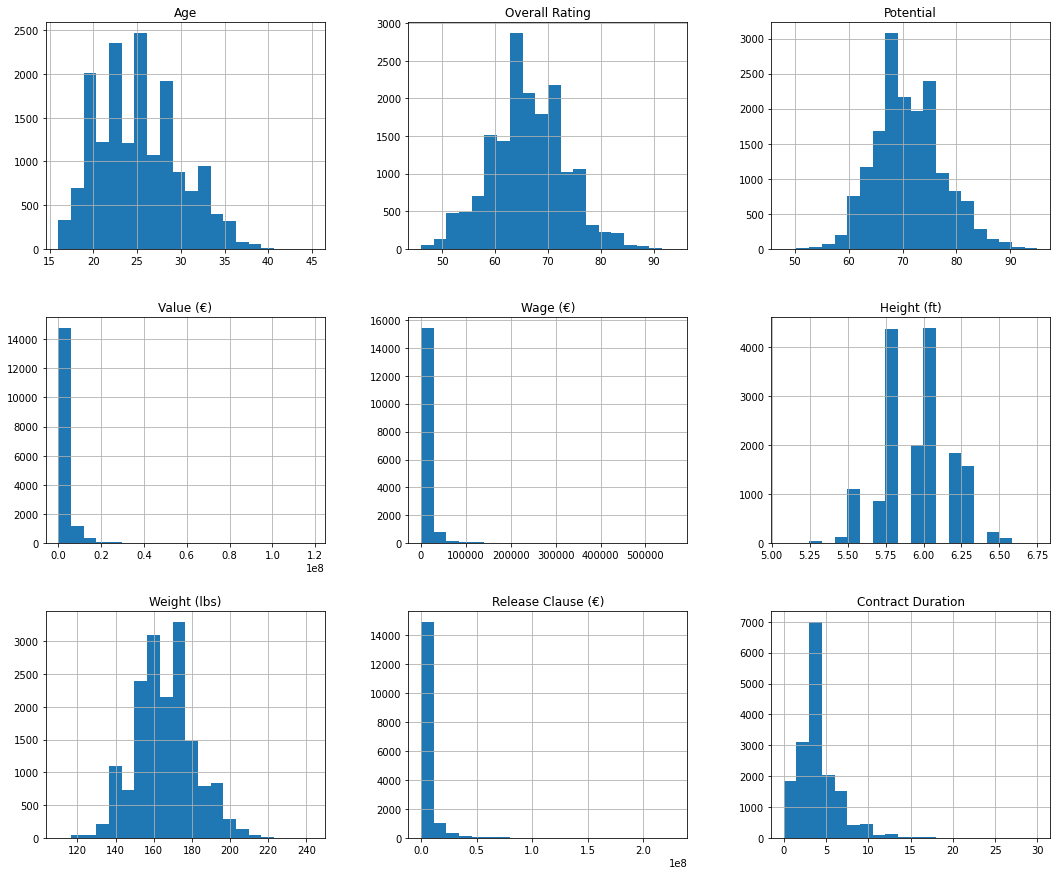

In [26]:
# Distribution of quantitative variables
column_index = ['Age','Overall Rating', 'Potential','Value (€)','Wage (€)', 'Height (ft)',
                'Weight (lbs)','Release Clause (€)','Contract Duration']
histogram1 = dat1[column_index].hist(bins=20, figsize=(18,15))

In [27]:
# Mean Value by position
mean_value_by_position = dat1[['Position','Value (€)']].groupby('Position').mean()
mean_value_by_position.index = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM',
                                'RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
                                'RWB','LB','LCB','CB','RCB','RB','GK']
mean_value_by_position.head()

,Value (€)
LS,3.079903e+06
ST,1.594074e+06
RS,2.102440e+06
LW,3.271970e+06
LF,1.986379e+06


In [28]:
std1 = dat1[['Position','Value (€)']].groupby('Position').std()
std1.index = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM',
                                'RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
                                'RWB','LB','LCB','CB','RCB','RB','GK']

On the graph below we can see what players are the most valued on a team by their position. 

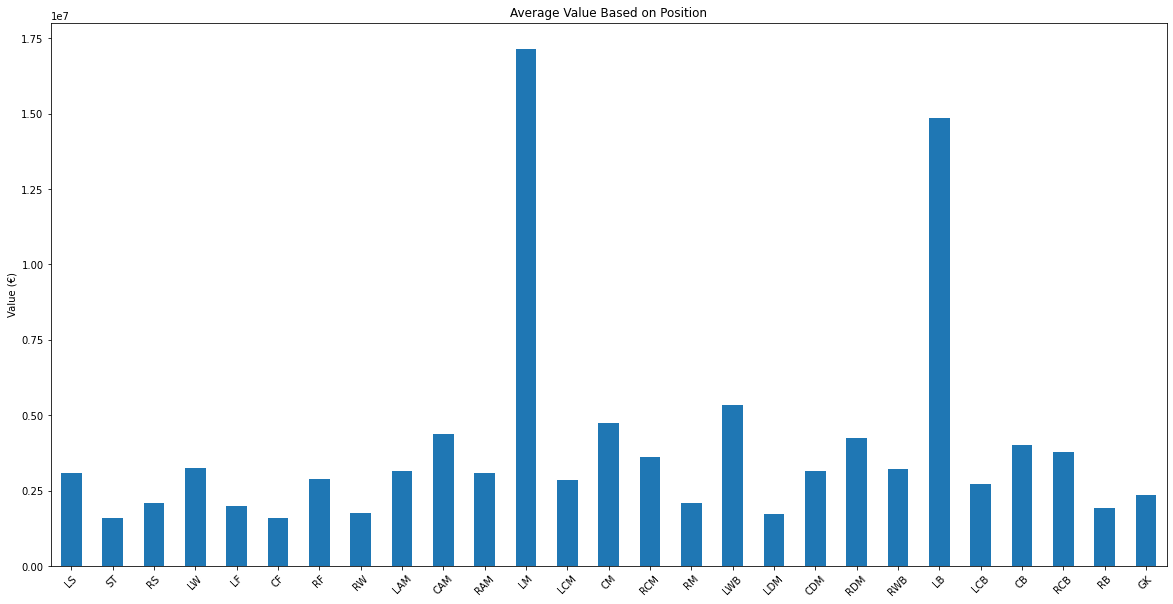

In [29]:
# Player Value based on position
mean_value_by_position.plot(kind='bar', legend = False,figsize=(20,10))
plt.title('Average Value Based on Position')
plt.xticks(rotation=45)
plt.ylabel('Value (€)')
plt.show()

In [30]:
# Mean Wage by position
mean_wage_by_position = dat1[['Position','Wage (€)']].groupby('Position').mean()
mean_wage_by_position.index = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM',
                                'RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM',
                                'RWB','LB','LCB','CB','RCB','RB','GK']

On the graph below we can see the average wage each position is paid.

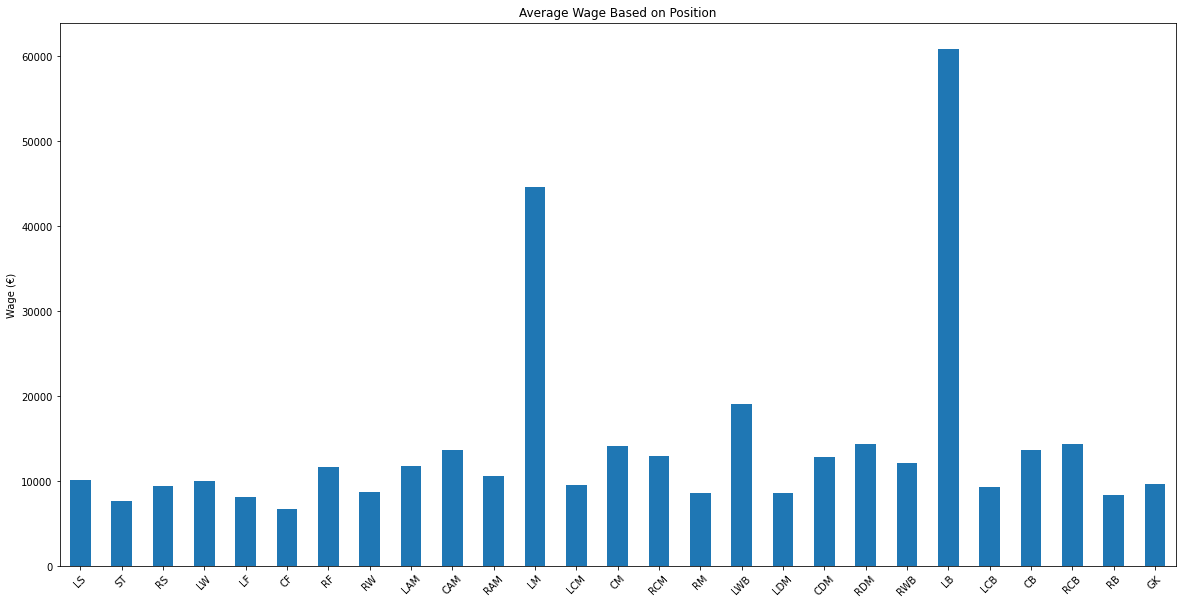

In [31]:
# Player Wage based on position
mean_wage_by_position.plot(kind='bar', legend = False,figsize=(20,10))
plt.title('Average Wage Based on Position')
plt.xticks(rotation=45)
plt.ylabel('Wage (€)')
plt.show()

On the graph below we can see that the higher the rating the higher the release clause is. 

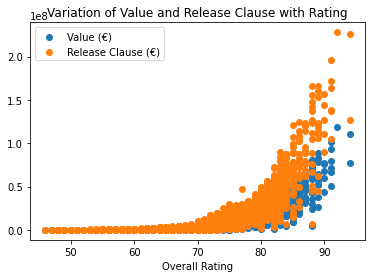

In [32]:
# Variation of Value and Release Clause with Rating
column_index = ['Value (€)', 'Release Clause (€)']
for i in column_index:
    scatter1 = plt.scatter(dat1['Overall Rating'], dat1[i])
plt.legend(['Value (€)', 'Release Clause (€)'])
plt.title('Variation of Value and Release Clause with Rating')
plt.xlabel('Overall Rating')
plt.show()

In the graphic below we can see the variation of wage with the rating. The higher wage means higher the rating of the player. 

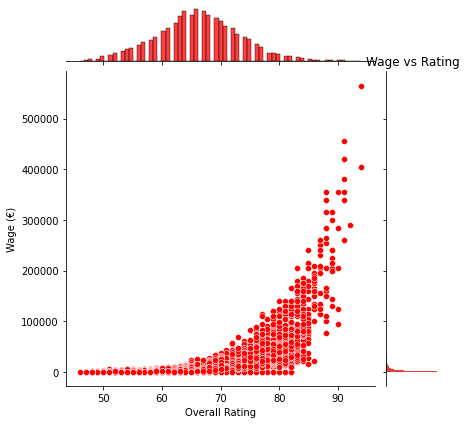

In [33]:
# Variation of Wage with Rating
sb.jointplot(x='Overall Rating',y='Wage (€)', data= dat1[['Overall Rating','Wage (€)']],color='r')
plt.title('Wage vs Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Wage (€)')
plt.show()

Below is a graph showing the variation between the value in € and the potential of the player. The higher the potential rating means higher the value. 

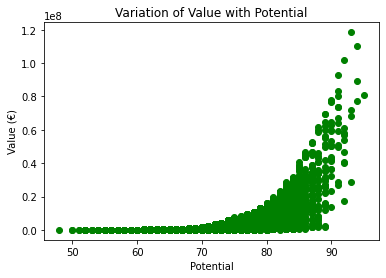

In [34]:
# Variation of Value with Potential
scatter1 = plt.scatter(dat1['Potential'], dat1['Value (€)'],color='g')
plt.title('Variation of Value with Potential')
plt.xlabel('Potential')
plt.ylabel('Value (€)')
plt.show()

Below we can see the distribution in overall rating with the player's age. 

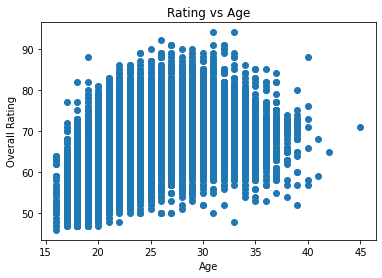

In [35]:
# Distribution of Overall Rating over Player Age
plt.scatter(dat1['Age'],dat1['Overall Rating'])
plt.title('Rating vs Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

In [36]:
mean_rating_by_preferred_foot = dat1[['Preferred Foot','Overall Rating']].groupby('Preferred Foot').mean()
mean_rating_by_preferred_foot.index = ['Left','Right']

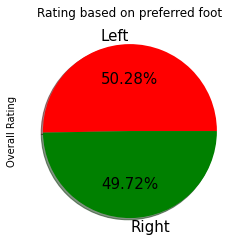

In [37]:
mean_rating_by_preferred_foot['Overall Rating'].plot(kind='pie',
                                                  colors=['r','g'],
                                                  autopct='%.2f%%',
                                                  fontsize=15,
                                                  figsize=(6,4),
                                                  shadow=True)
plt.title('Rating based on preferred foot')
plt.show()

## 4. Dimension Reduction

### 4.1 Data Normalization

In [38]:
dat2 = dat1[['Age','Overall Rating', 'Potential','Value (€)',
            'Wage (€)','International Reputation','Weak Foot',
            'Skill Moves','Height (ft)','Weight (lbs)','Release Clause (€)',
            'Contract Duration']]
dat2_norm = scale(dat2.loc[:,'Age':'Contract Duration'])
pd.DataFrame(dat2_norm).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,16643.0,-1.741882e-16,1.00003,-1.956181,-0.896061,-0.047964,0.800132,4.192517
1,16643.0,1.010975e-15,1.00003,-2.877097,-0.594001,-0.023226,0.690241,3.972193
2,16643.0,9.563274e-17,1.00003,-3.761999,-0.673183,-0.022906,0.627371,3.878756
3,16643.0,4.440092e-17,1.00003,-0.425257,-0.374562,-0.309008,-0.077383,20.288124
4,16643.0,3.757001e-17,1.00003,-0.387104,-0.387104,-0.297268,-0.072679,24.946580
5,16643.0,6.830910e-18,1.00003,-0.288104,-0.288104,-0.288104,-0.288104,9.748346
6,16643.0,-1.041714e-16,1.00003,-2.944206,0.086498,0.086498,0.086498,3.117202
7,16643.0,2.237123e-16,1.00003,-1.785470,-0.462426,-0.462426,0.860619,3.506707
8,16643.0,-3.936312e-16,1.00003,-3.930615,-0.890781,-0.119480,0.606451,3.646285
9,16643.0,-7.940933e-16,1.00003,-3.594720,-0.769652,-0.063384,0.642883,4.944692


### 4.2 Principal Component Analysis

#### 4.2.1 Full Component Solution

In [39]:
# Select the number of components
pca1 = PCA(n_components=12)

# Fit the PCA model
pca1.fit(dat2_norm)

PCA(n_components=12)

In [40]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 38.53  56.58  67.21  75.21  82.92  89.11  92.71  96.13  98.03  99.46
  99.96 100.  ]


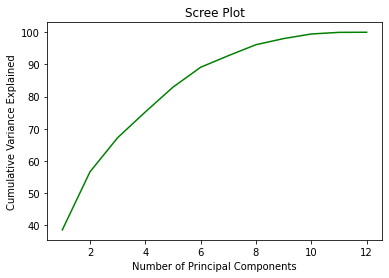

In [41]:
var1 = pd.DataFrame(var1, index=np.arange(1,13))
plt.plot(var1,color='g')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

#### 4.2.2 A 7-Component Solution

In [42]:
# Select the number of components
pca7 = PCA(n_components=7)
pca7.fit(dat2_norm)
data_pca7 = pca7.fit_transform(dat2_norm)

# Convert the numpy array to pandas DataFrame
data_pca7 = pd.DataFrame(data_pca7)
data_pca7.columns = ["PC"+str(i) for i in range(1,8)]

# Show the head of the DataFrame
data_pca7.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,34.612268,1.697010,6.045432,5.488196,9.753239,9.297132,6.686059
1,24.812528,2.638812,2.772919,-0.486374,7.946180,4.468730,3.351817
2,29.689896,-0.268912,5.578062,-0.171590,9.158686,7.017714,5.343334
3,19.987674,4.117569,4.975615,2.325568,5.497520,4.619099,0.888376
4,27.345649,0.756396,5.163055,0.813723,7.487883,7.261404,5.282458


In [43]:
# Correlation analysis
data_pca7.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PC1,1.000000e+00,-1.061733e-16,1.187097e-15,5.569778e-17,-1.871800e-16,1.488026e-15,-7.829942e-17
PC2,-1.061733e-16,1.000000e+00,-1.432603e-16,-5.202909e-17,8.829917e-18,-1.107825e-16,8.411020e-18
PC3,1.187097e-15,-1.432603e-16,1.000000e+00,6.987240e-16,2.628250e-16,-1.366433e-16,7.327785e-16
PC4,5.569778e-17,-5.202909e-17,6.987240e-16,1.000000e+00,-5.335057e-16,-5.011563e-16,-1.739298e-16
PC5,-1.871800e-16,8.829917e-18,2.628250e-16,-5.335057e-16,1.000000e+00,7.026944e-16,-6.861226e-17
PC6,1.488026e-15,-1.107825e-16,-1.366433e-16,-5.011563e-16,7.026944e-16,1.000000e+00,2.929181e-17
PC7,-7.829942e-17,8.411020e-18,7.327785e-16,-1.739298e-16,-6.861226e-17,2.929181e-17,1.000000e+00


The pairwise correlation between the principal components are close to zero indicating that there is no multicolinearity among the principal components

# 5. Data Preprocessing for Regression Analysis

In [44]:
dat1.index = dat1['Name']


In [45]:
dat1 = dat1.drop(['Name'],axis=1)

In [46]:
dat1.head()

,Age,Nationality,Overall Rating,Potential,Club,Value (€),Wage (€),Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height (ft),Weight (lbs),Release Clause (€),Contract Duration,Attack Rate,Defence Rate
Name,,,,,,,,,,,,,,,,,,
L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,RF,5.58,159.0,226500000.0,17,Medium,Medium
Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,ST,6.17,183.0,127100000.0,4,High,Low
Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,LW,5.75,150.0,228100000.0,5,High,Medium
De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,GK,6.33,168.0,138600000.0,9,Medium,Medium
K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,RCM,5.92,154.0,196400000.0,8,High,High


## 5.1 Creating Dummies for Categorical Variables 

In [47]:
# Creating dummies using one-hot technique
Nationality = pd.get_dummies(dat1['Nationality'], prefix = 'Nat')
Club = pd.get_dummies(dat1['Club'], prefix='Club')
Preferred_Foot = pd.get_dummies(dat1['Preferred Foot'], prefix = 'PF')
Position = pd.get_dummies(dat1['Position'], prefix = 'Pos')
Attack_Rate = pd.get_dummies(dat1['Attack Rate'], prefix = 'ARate')
Defence_Rate = pd.get_dummies(dat1['Defence Rate'], prefix = 'DRate')

In [48]:
X = pd.concat([Nationality, Club, Preferred_Foot, Position, Attack_Rate, Defence_Rate,
              dat1[['Age', 'Overall Rating', 'Potential', 'Value (€)',                    
                    'International Reputation', 'Weak Foot', 'Skill Moves', 'Height (ft)',
                    'Weight (lbs)', 'Release Clause (€)', 'Contract Duration']]],axis=1,sort = False)
y = dat1['Wage (€)']

In [49]:
X.shape

(16643, 858)

## 5.2 Regression Analysis

In [50]:
dat3 = dat1

In [51]:
dat4 = dat3.drop(['Wage (€)'],axis=1)

X1 = pd.concat([Nationality, Club, Preferred_Foot, Position, Attack_Rate, Defence_Rate,
               dat4],axis=1,sort=False)

In [52]:
X2 = X1.drop(['Position', 'Attack Rate', 'Preferred Foot', 'Nationality', 'Defence Rate', 'Club', 
              'Nat_Afghanistan', 'Club_ SSV Jahn Regensburg', 'PF_Left', 'Pos_CAM', 
             'ARate_Low', 'DRate_ Low'],axis=1)
X2['Const'] = 1

In [53]:
X2.index = range(0,16643)

In [54]:
from sklearn.linear_model import LinearRegression
mod_sk = LinearRegression(fit_intercept=False).fit(X2,y)

In [55]:
print(mod_sk.coef_)

[ 1.06381887e+03  8.68203691e+02 -4.59144190e+02  4.55968057e+02
 -1.89500118e+03  9.17465234e+02  5.06688377e+03  1.58319938e+03
  1.66348005e+03 -2.39792071e+02 -1.84276271e+03 -1.45151343e+03
  2.23859885e+03  3.00014832e+02  1.51982621e+03 -2.52803407e+03
  1.19846299e+03  1.42412429e+03 -4.10085934e+02  2.13777825e+03
 -2.01181315e+03  1.11666655e+03  1.31739904e+00  1.49180561e+03
  2.29066488e+03 -3.87204400e+02 -6.45140242e+03  1.53923533e+04
  1.89310997e+03  9.87844721e+03  2.42481334e+03 -2.27703525e+02
  6.66126308e+01  2.53127007e+03  3.80027313e+03  1.94990148e+03
  1.08611404e+03 -2.18642183e+03  6.51930679e+02  5.60464620e+02
  2.24291163e+02  6.66675531e+03  3.40483932e+03  1.20061527e+03
  2.83806557e+03 -2.58143908e+03  4.63569155e+03 -4.89214410e+02
  1.68411369e+03 -9.28159654e+02  6.44335761e+02  9.60878038e+02
 -7.06265701e+02  6.39126681e+02 -2.49308841e+02  4.29362295e+03
  3.05959860e+03  1.54259608e+03  1.21492881e+03  1.77127899e+03
  2.94513298e+03 -1.75670

## 5.3 Data Partition

In [56]:
from sklearn.model_selection import train_test_split

# 40-60% simple split
# To make the result reproducible, set the random_state
train_y,test_y,train_X,test_X = train_test_split(y, X,
                                                 test_size=0.4,
                                                 random_state=123)

In [57]:
train_X.shape

(9985, 858)

In [58]:
test_X.shape

(6658, 858)

## 5.4 Normalize Data

In [59]:
from sklearn import preprocessing

# Create a scaler to do the transformation
scaler = preprocessing.MinMaxScaler().fit(train_X)

train_scale_y = preprocessing.MinMaxScaler().fit(train_y.values.reshape(-1,1).astype(float))

In [60]:
# Transform training X
train_X_norm = pd.DataFrame(scaler.transform(train_X))
train_X_norm.columns = train_X.columns

# Transform test X
test_X_norm = pd.DataFrame(scaler.transform(test_X))
test_X_norm.columns = test_X.columns

# Transform training y
train_y_norm = train_scale_y.transform(train_y.values.reshape(-1,1))
train_y_norm = pd.Series(train_y_norm.reshape(train_y.shape[0],))

# Transform test y
test_y_norm = train_scale_y.transform(test_y.values.reshape(-1,1))
test_y_norm = pd.Series(test_y_norm.reshape(test_y.shape[0],))


In [61]:
train_X_norm.describe().transpose().sample(5)

,count,mean,std,min,25%,50%,75%,max
Club_Bury,9985.0,0.001903,0.043582,0.0,0.0,0.0,0.0,1.0
Club_Clermont Foot 63,9985.0,0.001602,0.040000,0.0,0.0,0.0,0.0,1.0
Club_Hertha BSC,9985.0,0.001402,0.037420,0.0,0.0,0.0,0.0,1.0
Club_Wigan Athletic,9985.0,0.001202,0.034648,0.0,0.0,0.0,0.0,1.0
Nat_Mozambique,9985.0,0.000300,0.017332,0.0,0.0,0.0,0.0,1.0


In [62]:
train_y_norm.describe().transpose()

count    9985.000000
mean        0.015346
std         0.039397
min         0.000000
25%         0.000000
50%         0.003546
75%         0.012411
max         1.000000
dtype: float64

In [63]:
test_X_norm.describe().transpose().sample(5)

,count,mean,std,min,25%,50%,75%,max
Nat_Lebanon,6658.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Nat_Luxembourg,6658.0,0.000300,0.017330,0.0,0.0,0.0,0.0,1.0
Club_Stade Brestois 29,6658.0,0.002253,0.047415,0.0,0.0,0.0,0.0,1.0
Club_GFC Ajaccio,6658.0,0.000751,0.027396,0.0,0.0,0.0,0.0,1.0
Nat_Colombia,6658.0,0.032442,0.177185,0.0,0.0,0.0,0.0,1.0


In [64]:
test_y_norm.describe().transpose()

count    6658.000000
mean        0.015181
std         0.039593
min         0.000000
25%         0.000000
50%         0.003546
75%         0.012411
max         0.804965
dtype: float64

## 5.5 Feature Selection Using RF

In [65]:
from sklearn.ensemble import RandomForestRegressor

Here, we select the most important features that will be used for developing our predictive models  

In [66]:
# Train an RF regressor
rf = RandomForestRegressor(n_estimators=50, max_features=30, random_state=123)
rf.fit(train_X_norm,train_y_norm)

RandomForestRegressor(max_features=30, n_estimators=50, random_state=123)

In [67]:
# Show feature importance
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_X_norm.columns,
                                   columns=['importance'])
feature_importances = feature_importances.sort_values('importance',ascending=False)

feature_importances.head(10)

,importance
Overall Rating,0.149345
Release Clause (€),0.138760
Value (€),0.123164
Potential,0.111284
International Reputation,0.094159
Age,0.031507
Contract Duration,0.031474
Skill Moves,0.025399
Club_FC Barcelona,0.020445
Weight (lbs),0.015353


In [68]:
# Select the 100 most important features
train_X_norm_imp = train_X_norm[feature_importances.index[range(100)]]

test_X_norm_imp = test_X_norm[feature_importances.index[range(100)]]

# 6. Predictive Modeling 

## 6.1 Random Forest Using Important Features

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [70]:
para_rf = {'n_estimators':[50,100,150,200],
           'max_depth':[10,30,50,60,80,100],
           'random_state':[123]}
para_rf

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [10, 30, 50, 60, 80, 100],
 'random_state': [123]}

In [71]:
rf2 = RandomForestRegressor()

# Use a 5-fold cross-validation
grid_rf = GridSearchCV(rf2, para_rf, scoring='neg_mean_squared_error', cv=5)
grid_rf.fit(train_X_norm_imp,train_y_norm)

# Obtain the best hyper-parameters
grid_rf.best_params_

{'max_depth': 50, 'n_estimators': 150, 'random_state': 123}

### 6.1.1 The Optimal RF Model

In [72]:
# Train a new RF with optimal parameters
rf_final = RandomForestRegressor(n_estimators=150, 
                                   max_depth=30,
                                   random_state=123)
rf_final.fit(train_X_norm_imp,train_y_norm)
# Predict on test set
pred_y_rf_final = rf_final.predict(test_X_norm_imp)

In [73]:
# Denormalizing the predicted y
pred_y_RF = train_scale_y.inverse_transform(pred_y_rf_final.reshape(-1,1))
pred_y_RF = pd.Series(pred_y_RF.reshape(pred_y_rf_final.shape[0],))


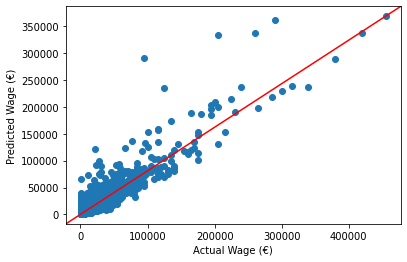

In [74]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y_RF)
plt.xlabel('Actual Wage (€)')
plt.ylabel('Predicted Wage (€)')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [75]:
metrics.r2_score(test_y,pred_y_RF)

0.8535826834619127

## 6.2 Support Vector Machine (SVM) Using 100 Most Important Variables

In [76]:
from sklearn import svm

In [77]:
parameters = {'kernel':('linear','rbf','poly'),
              'C':[0.001,0.005,0.1,0.5,1,5,10,20],
              'gamma':[0.01,0.02,0.03]}
parameters

{'kernel': ('linear', 'rbf', 'poly'),
 'C': [0.001, 0.005, 0.1, 0.5, 1, 5, 10, 20],
 'gamma': [0.01, 0.02, 0.03]}

In [78]:
svc = svm.SVR(kernel='rbf')
grid_svr = GridSearchCV(svc, parameters, scoring='neg_mean_squared_error', cv=5)
grid_svr.fit(train_X_norm_imp,train_y_norm)

grid_svr.best_params_

{'C': 1, 'gamma': 0.02, 'kernel': 'rbf'}

### 6.2.1 Optimal SVM Model

In [79]:
# Train a new SVC with optimal parameters
svr_final = svm.SVR(kernel='rbf', C=1, gamma=0.02)
svr_final.fit(train_X_norm_imp,train_y_norm)

# Predict on test set
pred_y_svm2 = svr_final.predict(test_X_norm_imp)

In [80]:
# Denormalizing the predicted y
pred_y_SVM = train_scale_y.inverse_transform(pred_y_svm2.reshape(-1,1))
pred_y_SVM = pd.Series(pred_y_SVM.reshape(pred_y_svm2.shape[0],))

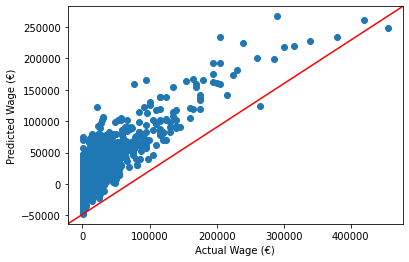

In [81]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y_SVM)
plt.xlabel('Actual Wage (€)')
plt.ylabel('Predicted Wage (€)')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [82]:
metrics.r2_score(test_y_norm,pred_y_svm2)

0.514471446453059

## 6.3 Artificial Neural Networks (ANN)

In [83]:
from sklearn.neural_network import MLPRegressor

In [84]:
parameters = {'hidden_layer_sizes':[[40,40,40,40,40,40,40],[20,20,20,20,20,20,20],
                                    [10,10,10,10,10,10,10],[13,12,11,10,9,8,7]]}

mlp = MLPRegressor(solver='lbfgs', alpha=1e-5,
                      random_state=1)
grid_mlp = GridSearchCV(mlp, parameters, scoring='neg_mean_squared_error', cv=5)

grid_mlp.fit(train_X_norm_imp, train_y_norm)

grid_mlp.best_params_

{'hidden_layer_sizes': [13, 12, 11, 10, 9, 8, 7]}

### 6.3.1 Optimal ANN Model

In [85]:
mlp = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(40, 40, 40, 40, 40, 40, 40), random_state=1)

mlp.fit(train_X_norm_imp, train_y_norm)

pred_y_MLP = mlp.predict(test_X_norm_imp)

In [86]:
# Denormalizing the predicted y
pred_y_ANN = train_scale_y.inverse_transform(pred_y_MLP.reshape(-1,1))
pred_y_ANN = pd.Series(pred_y_ANN.reshape(pred_y_MLP.shape[0],))

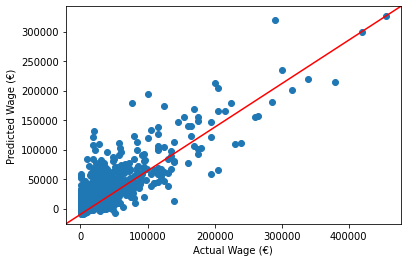

In [87]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y_ANN)
plt.xlabel('Actual Wage (€)')
plt.ylabel('Predicted Wage (€)')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [88]:
metrics.r2_score(test_y_norm,pred_y_MLP)

0.7027931494134934

## 6.4 Gradient Tree Boosting (GTB)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
parameters = {'max_depth': [1,2,3,5,10,20],
              'n_estimators':[130,140,150,170,200],
              'learning_rate':[0.1,0.5,1,2,1],
              'random_state':[123]}
clf = GradientBoostingRegressor()

grid_gtb = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error', cv=5)

grid_gtb.fit(train_X_norm_imp, train_y_norm)

grid_gtb.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'n_estimators': 200,
 'random_state': 123}

### 6.4.1 Optimal GTB Model

In [91]:
gtb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.5,
                                 max_depth=2, random_state=123)
gtb.fit(train_X_norm_imp, train_y_norm)

pred_y_gtb = gtb.predict(test_X_norm_imp)

In [92]:
# Denormalizing the predicted y
pred_y_GBM = train_scale_y.inverse_transform(pred_y_gtb.reshape(-1,1))
pred_y_GBM= pd.Series(pred_y_GBM.reshape(pred_y_gtb.shape[0],))

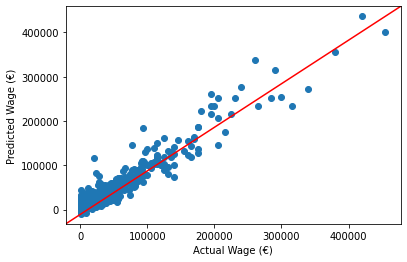

In [93]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y_GBM)
plt.xlabel('Actual Wage (€)')
plt.ylabel('Predicted Wage (€)')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [94]:
metrics.r2_score(test_y_norm,pred_y_gtb)

0.9213667750433846

## 6.5 Extremely Randomized Trees (ERT)

In [95]:
from sklearn.ensemble import ExtraTreesRegressor

In [96]:
parameters = {'max_depth': [None],
              'n_estimators':[50,100,150],
              'min_samples_split':[2,3,4,5,10,15],
              'random_state':[1]}
clf = ExtraTreesRegressor()

grid_ert = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error', cv=5)

grid_ert.fit(train_X_norm_imp, train_y_norm)

grid_ert.best_params_

{'max_depth': None,
 'min_samples_split': 4,
 'n_estimators': 100,
 'random_state': 1}

### 6.5.1 Optimal ERT Model

In [97]:
ert = ExtraTreesRegressor(n_estimators=150, max_depth=None,
                           min_samples_split=2, random_state=1)

ert.fit(train_X_norm_imp, train_y_norm)

pred_y_ert = ert.predict(test_X_norm_imp)

In [98]:
# Denormalizing the predicted y
pred_y_ERT = train_scale_y.inverse_transform(pred_y_ert.reshape(-1,1))
pred_y_ERT = pd.Series(pred_y_ERT.reshape(pred_y_ert.shape[0],))

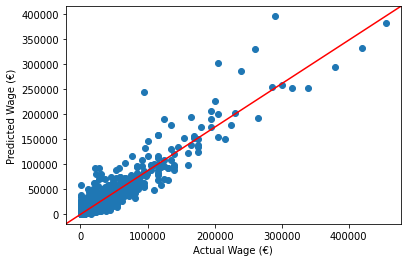

In [99]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y_ERT)
plt.xlabel('Actual Wage (€)')
plt.ylabel('Predicted Wage (€)')
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [100]:
metrics.r2_score(test_y_norm,pred_y_ert)

0.8796725562969877

## 6.6 Comparing the Performance of All the Models 

In [101]:
from math import sqrt

In [102]:
MAE = [metrics.mean_absolute_error(test_y,pred_y_RF),
      metrics.mean_absolute_error(test_y,pred_y_SVM),
      metrics.mean_absolute_error(test_y,pred_y_ANN),
      metrics.mean_absolute_error(test_y,pred_y_GBM),
      metrics.mean_absolute_error(test_y,pred_y_ERT)]

MSE = [metrics.mean_squared_error(test_y,pred_y_RF),
      metrics.mean_squared_error(test_y,pred_y_SVM),
      metrics.mean_squared_error(test_y,pred_y_ANN),
      metrics.mean_squared_error(test_y,pred_y_GBM),
      metrics.mean_squared_error(test_y,pred_y_ERT)]

RMSE = [sqrt(metrics.mean_squared_error(test_y,pred_y_RF)),
      sqrt(metrics.mean_squared_error(test_y,pred_y_SVM)),
      sqrt(metrics.mean_squared_error(test_y,pred_y_ANN)),
      sqrt(metrics.mean_squared_error(test_y,pred_y_GBM)),
      sqrt(metrics.mean_squared_error(test_y,pred_y_ERT))]

R2 = [metrics.r2_score(test_y,pred_y_RF),
      metrics.r2_score(test_y,pred_y_SVM),
      metrics.r2_score(test_y,pred_y_ANN),
      metrics.r2_score(test_y,pred_y_GBM),
      metrics.r2_score(test_y,pred_y_ERT)]


In [103]:
Model_perf = pd.DataFrame({'MAE':MAE, 'MSE':MSE,
                           'RMSE':RMSE,'R-Squared':R2},
                         index = ['Random Forest', 'Support Vector Machine', 'Multi-Layer Perceptron', 
                                  'Gradient Tree Boosting', 'Extremely Randomized Tree'])
Model_perf

,MAE,MSE,RMSE,R-Squared
Random Forest,3514.729620,7.299936e+07,8543.966296,0.853583
Support Vector Machine,11556.536642,2.420702e+08,15558.606347,0.514471
Multi-Layer Perceptron,6414.115853,1.481786e+08,12172.862399,0.702793
Gradient Tree Boosting,3042.660113,3.920421e+07,6261.326470,0.921367
Extremely Randomized Tree,3336.011815,5.999172e+07,7745.432084,0.879673


**From the performance metrics above, it is seen that the ensemble method, Gradient Tree Boosting has the best performance in terms of all the metrics except in mean absolute error. Support Vector Machine has the worse performace. It is worse in all the metrics.**

**So for our project, we selected Gradient Tree Boosting model which has an R-squared of 92.57 for predicting the Wages of soccer players.**

# 7. Final Predictive Model 

In [104]:
gtb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.5,
                                 max_depth=2, random_state=123)
gtb.fit(train_X_norm_imp, train_y_norm)

pred_y_gtb = gtb.predict(test_X_norm_imp)

## 7.1. Metrics of Final Model

In [105]:
pd.DataFrame({'MAE':metrics.mean_absolute_error(test_y,pred_y_GBM),
              'MSE':metrics.mean_squared_error(test_y,pred_y_GBM),
              'RMSE':sqrt(metrics.mean_squared_error(test_y,pred_y_GBM)),
              'R-Squared':metrics.r2_score(test_y,pred_y_GBM)}, index = ['Gradient Tree Boosting'])

,MAE,MSE,RMSE,R-Squared
Gradient Tree Boosting,3042.660113,3.920421e+07,6261.32647,0.921367


# Summary

From the analysis, it is observed that Wages, Value and Release Clause are positively correlated with the player overall rating and potential rating but the relation is not linear.

Five predictive models were applied and obtained great predictive capabilities with R-squared as high as 0.92. The models can be applied for the prediction of wages of players